# Algoritmos de Regresion

Linear Algorithms : Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN).

Nonlinear Algorithms : Classification and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).

In [4]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot

%matplotlib inline
pd.set_option('display.width', 100)
pd.set_option('precision', 3)

filename = "data/boston-housing/housing.csv"

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, names=names)

10-fold cross-validation  

Mean Squared Error (MSE) metric

In [5]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

## Algoritmos con datos sin escalar

In [6]:
# Linear Algorithms (no tiene tantos problemas con los datos originales)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#  Nonlinear Algorithms (problemas con datos sin escalar)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


# Spot-Check Algorithms
models = []
# Linear Algorithms 
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))

#  Nonlinear Algorithms
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

### Dividir los datos

In [7]:
from sklearn.model_selection import train_test_split

# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]

validation_size = 0.20 #   20%
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Probar los algoritmos

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -29.913923 (14.409141)
SVR: -85.518342 (31.994798)


### Comparar algoritmos

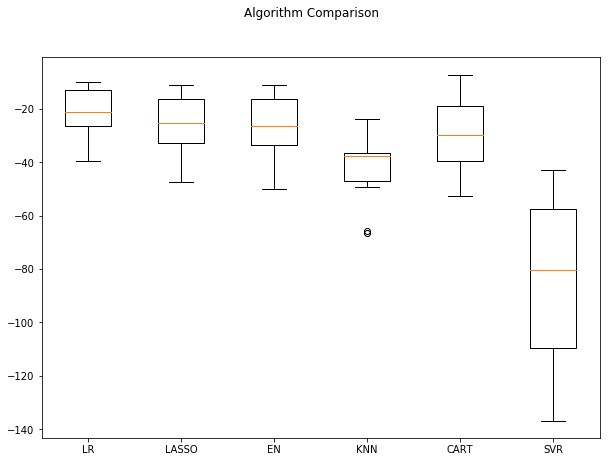

In [9]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Standarizar datos y modelo

Solamente hace falta estandarizar las X, las Y las infiere el modelo en su escala

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics  import mean_squared_error

# Standardize the dataset
pipelines = []
#                   (NOMBRE, Pipeline([ (Nombre1, Accion1), (Nombre2, Accion2), (Nombre3, Accion3) ..... ]))
pipelines.append(   ('ScaledLR',       Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])   )   )
pipelines.append(   ('ScaledLASSO',    Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])        )   )

pipelines.append(   ('ScaledEN',    Pipeline([('Scaler', StandardScaler()),    ('EN', ElasticNet())])))
pipelines.append(   ('ScaledKNN',   Pipeline([('Scaler', StandardScaler()),    ('KNN', KNeighborsRegressor())])))
pipelines.append(   ('ScaledCART',  Pipeline([('Scaler', StandardScaler()),    ('CART', DecisionTreeRegressor())])))
pipelines.append(   ('ScaledSVR',   Pipeline([('Scaler', StandardScaler()),    ('SVR', SVR())])))




In [13]:
# evaluate each model in turn
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -27.277091 (14.176555)
ScaledSVR: -29.633086 (17.009186)


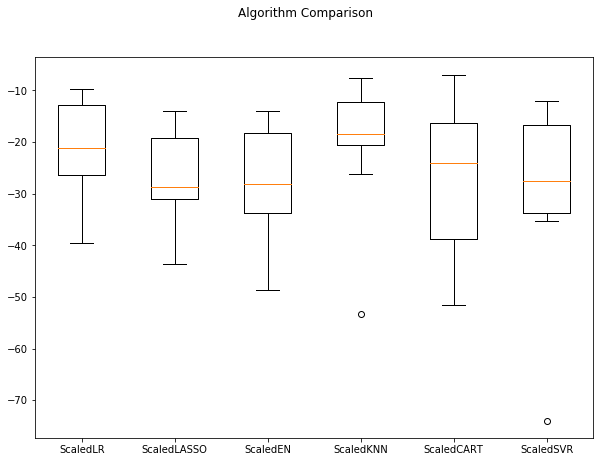

In [14]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()